In [80]:
# DOWNLOADING DATA

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

tomato_discount = pd.read_csv('Dataframes/tomato_discount.csv')
tomato_12 = pd.read_csv('Dataframes/tomato_12.csv') # or index_col = 0 instead of index = False in 'qjuices'

tomato_12

,date,salesvolume_24089,salesvolume_46135,salesvolume_46902,salesvolume_59042,salesvolume_75320,salesvolume_83524,salesvolume_201676,salesvolume_362058,salesvolume_415514,...,is_supplied_468558,is_supplied_471503,is_supplied_472150,is_supplied_481677,is_supplied_483692,is_supplied_485033,is_supplied_487776,is_supplied_489135,is_supplied_495154,is_supplied_600761
0,2009-01-08,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2009-01-09,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2009-01-10,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2009-01-11,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2009-01-12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,2014-12-26,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,8.0,...,1,1,0,0,0,0,0,1,1,0
2179,2014-12-27,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,...,1,1,0,0,0,0,0,1,1,0
2180,2014-12-28,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,8.0,...,1,1,0,0,0,0,0,1,1,0
2181,2014-12-29,1.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,7.0,...,1,1,0,0,0,0,0,1,1,0


In [81]:
# SETTING DATA TO TARGET

target_sku = '201676'

sales_names_to_shift = [col for col in tomato_12.columns if 'salesvolume' in col and target_sku not in col]

tomato_12.loc[:, sales_names_to_shift] = tomato_12.loc[:, sales_names_to_shift].shift(1)
tomato_12 = tomato_12.iloc[1:, :]

for colname in sales_names_to_shift:
    tomato_12.rename(columns = {colname: colname + '_lag'}, inplace = True)

tomato_12.rename(columns = {'salesvolume_' + target_sku: 'target', 'av_price_' + target_sku: 'price_of_target'}, inplace = True)
tomato_12.reset_index(drop = True, inplace = True)

print('Corr between target and it\'s price: {}'.format(round(tomato_12.corr().loc['target', 'price_of_target'], 4)))

tomato_12

Corr between target and it's price: -0.4644


,date,salesvolume_24089_lag,salesvolume_46135_lag,salesvolume_46902_lag,salesvolume_59042_lag,salesvolume_75320_lag,salesvolume_83524_lag,target,salesvolume_362058_lag,salesvolume_415514_lag,...,is_supplied_468558,is_supplied_471503,is_supplied_472150,is_supplied_481677,is_supplied_483692,is_supplied_485033,is_supplied_487776,is_supplied_489135,is_supplied_495154,is_supplied_600761
0,2009-01-09,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2009-01-10,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2009-01-11,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2009-01-12,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2009-01-13,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2014-12-26,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,6.0,...,1,1,0,0,0,0,0,1,1,0
2178,2014-12-27,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,...,1,1,0,0,0,0,0,1,1,0
2179,2014-12-28,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,...,1,1,0,0,0,0,0,1,1,0
2180,2014-12-29,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,...,1,1,0,0,0,0,0,1,1,0


In [82]:
# ADDING more LAGS

names_to_shift = [col for col in tomato_12.columns if 'salesvolume_' in col] + \
                 [col for col in tomato_12.columns if 'av_price_' in col] + \
                 [col for col in tomato_12.columns if 'is_supplied' in col] + \
                 ['target']

for i in [1, 2, 6, 7]:
    for col in names_to_shift:
        tomato_12[col + '_' + str(i)] = tomato_12[col].shift(i)

tomato_12 = tomato_12[7:]

tomato_12.reset_index(drop = True, inplace = True)

tomato_12

,date,salesvolume_24089_lag,salesvolume_46135_lag,salesvolume_46902_lag,salesvolume_59042_lag,salesvolume_75320_lag,salesvolume_83524_lag,target,salesvolume_362058_lag,salesvolume_415514_lag,...,is_supplied_471503_7,is_supplied_472150_7,is_supplied_481677_7,is_supplied_483692_7,is_supplied_485033_7,is_supplied_487776_7,is_supplied_489135_7,is_supplied_495154_7,is_supplied_600761_7,target_7
0,2009-01-16,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009-01-17,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009-01-18,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009-01-19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009-01-20,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,2014-12-26,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0
2171,2014-12-27,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0
2172,2014-12-28,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2173,2014-12-29,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
# SETTING X, y

date = tomato_12['date']
X = tomato_12.drop(['target', 'date'], axis = 1)
y = tomato_12['target']

def timesplit(X, y, train_size = 0.8):
    n = len(y)
    n_train = int(n * train_size)
    X_train, X_holdout = X[:n_train], X[n_train:]
    y_train, y_holdout = y[:n_train], y[n_train:]
    return X_train, X_holdout, y_train, y_holdout

X_train, X_test, y_train, y_test = timesplit(X, y)

In [84]:
# https://github.com/jamesdj/tobit/

import math
import warnings

import numpy as np
import pandas as pd
from scipy.optimize import minimize
import scipy.stats
from scipy.special import log_ndtr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


def split_left_right_censored(x, y, cens):
    counts = cens.value_counts()
    if -1 not in counts and 1 not in counts:
        warnings.warn("No censored observations; use regression methods for uncensored data")
    xs = []
    ys = []

    for value in [-1, 0, 1]:
        if value in counts:
            split = cens == value
            y_split = np.squeeze(y[split].values)
            x_split = x[split].values

        else:
            y_split, x_split = None, None
        xs.append(x_split)
        ys.append(y_split)
    return xs, ys


def tobit_neg_log_likelihood(xs, ys, params):
    x_left, x_mid, x_right = xs
    y_left, y_mid, y_right = ys

    b = params[:-1]
    # s = math.exp(params[-1])
    s = params[-1]

    to_cat = []

    cens = False
    if y_left is not None:
        cens = True
        left = (y_left - np.dot(x_left, b))
        to_cat.append(left)
    if y_right is not None:
        cens = True
        right = (np.dot(x_right, b) - y_right)
        to_cat.append(right)
    if cens:
        concat_stats = np.concatenate(to_cat, axis=0) / s
        log_cum_norm = scipy.stats.norm.logcdf(concat_stats)  # log_ndtr(concat_stats)
        cens_sum = log_cum_norm.sum()
    else:
        cens_sum = 0

    if y_mid is not None:
        mid_stats = (y_mid - np.dot(x_mid, b)) / s
        mid = scipy.stats.norm.logpdf(mid_stats) - math.log(max(np.finfo('float').resolution, s))
        mid_sum = mid.sum()
    else:
        mid_sum = 0

    loglik = cens_sum + mid_sum

    return - loglik


def tobit_neg_log_likelihood_der(xs, ys, params):
    x_left, x_mid, x_right = xs
    y_left, y_mid, y_right = ys

    b = params[:-1]
    # s = math.exp(params[-1]) # in censReg, not using chain rule as below; they optimize in terms of log(s)
    s = params[-1]

    beta_jac = np.zeros(len(b))
    sigma_jac = 0

    if y_left is not None:
        left_stats = (y_left - np.dot(x_left, b)) / s
        l_pdf = scipy.stats.norm.logpdf(left_stats)
        l_cdf = log_ndtr(left_stats)
        left_frac = np.exp(l_pdf - l_cdf)
        beta_left = np.dot(left_frac, x_left / s)
        beta_jac -= beta_left

        left_sigma = np.dot(left_frac, left_stats)
        sigma_jac -= left_sigma

    if y_right is not None:
        right_stats = (np.dot(x_right, b) - y_right) / s
        r_pdf = scipy.stats.norm.logpdf(right_stats)
        r_cdf = log_ndtr(right_stats)
        right_frac = np.exp(r_pdf - r_cdf)
        beta_right = np.dot(right_frac, x_right / s)
        beta_jac += beta_right

        right_sigma = np.dot(right_frac, right_stats)
        sigma_jac -= right_sigma

    if y_mid is not None:
        mid_stats = (y_mid - np.dot(x_mid, b)) / s
        beta_mid = np.dot(mid_stats, x_mid / s)
        beta_jac += beta_mid

        mid_sigma = (np.square(mid_stats) - 1).sum()
        sigma_jac += mid_sigma

    combo_jac = np.append(beta_jac, sigma_jac / s)  # by chain rule, since the expression above is dloglik/dlogsigma

    return -combo_jac


class TobitModel:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.ols_coef_ = None
        self.ols_intercept = None
        self.coef_ = None
        self.intercept_ = None
        self.sigma_ = None

    def fit(self, x, y, cens, verbose=False):
        """
        Fit a maximum-likelihood Tobit regression
        :param x: Pandas DataFrame (n_samples, n_features): Data
        :param y: Pandas Series (n_samples,): Target
        :param cens: Pandas Series (n_samples,): -1 indicates left-censored samples, 0 for uncensored, 1 for right-censored
        :param verbose: boolean, show info from minimization
        :return:
        """
        x_copy = x.copy()
        if self.fit_intercept:
            x_copy.insert(0, 'intercept', 1.0)
        else:
            x_copy.scale(with_mean=True, with_std=False, copy=False)
        init_reg = LinearRegression(fit_intercept=False).fit(x_copy, y)
        b0 = init_reg.coef_
        y_pred = init_reg.predict(x_copy)
        resid = y - y_pred
        resid_var = np.var(resid)
        s0 = np.sqrt(resid_var)
        params0 = np.append(b0, s0)
        xs, ys = split_left_right_censored(x_copy, y, cens)

        result = minimize(lambda params: tobit_neg_log_likelihood(xs, ys, params), params0, method='BFGS',
                          jac=lambda params: tobit_neg_log_likelihood_der(xs, ys, params), options={'disp': verbose})
        if verbose:
            print(result)
        self.ols_coef_ = b0[1:]
        self.ols_intercept = b0[0]
        if self.fit_intercept:
            self.intercept_ = result.x[1]
            self.coef_ = result.x[1:-1]
        else:
            self.coef_ = result.x[:-1]
            self.intercept_ = 0
        self.sigma_ = result.x[-1]
        return self

    def predict(self, x):
        return self.intercept_ + np.dot(x, self.coef_)

    def score(self, x, y, scoring_function=mean_absolute_error):
        y_pred = np.dot(x, self.coef_)
        return scoring_function(y, y_pred)

In [88]:
y_train_clip

0       True
1       True
2       True
3       True
4       True
        ... 
1735    True
1736     1.0
1737    True
1738    True
1739    True
Name: target, Length: 1740, dtype: object

In [85]:
cens_train = pd.Series(np.zeros((len(y_train),)))
cens_train[y <= 0] = -1
# cens_train[y > 0] = 1   # ?
cens_train

y_train_clip = y_train.clip(upper= y < 1000, lower= y <= 0)
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2170    1.0
2171    0.0
2172    1.0
2173    0.0
2174    2.0
Name: target, Length: 2175, dtype: float64

In [86]:
tobit_res = TobitModel().fit(x = X_train, y = y_train_clip, cens = cens_train, verbose = False)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [54]:
tobit_res.predict(X_test)

array([-5602.73601445, -5602.9714213 , -5604.08688054, -5605.47507735,
       -5607.08217272, -5606.1048325 , -5601.23764608, -5602.87101978,
       -5602.52330069, -5603.38131744, -5606.20557189, -5609.81656826,
       -5602.01281858, -5605.01464223, -5605.39970789, -5605.62337732,
       -5603.67506821, -5604.77768345, -5606.02969785, -5606.73840443,
       -5607.90258693, -5606.19985001, -5607.45072945, -5607.77744858,
       -5605.987053  , -5605.94071518, -5603.06019954, -5603.69508018,
       -5605.8283252 , -5603.6914532 , -5604.36451938, -5604.70804942,
       -5605.52368695, -5605.71624143, -5604.36862645, -5606.51625553,
       -5608.49369062, -5607.72839437, -5606.95932091, -5608.59455176,
       -5606.91459274, -5604.50278106, -5607.24132054, -5607.30834937,
       -5607.60172599, -5608.09264673, -5609.2509945 , -5610.15699722,
       -5610.14868498, -5610.3312102 , -5611.90950209, -5611.37230097,
       -5609.80795684, -5609.06326976, -5610.41110286, -5610.61000146,
      

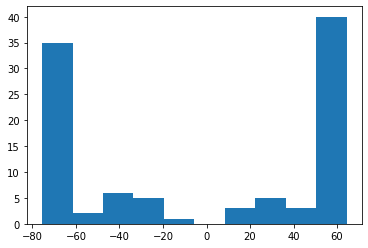

In [89]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

rs = np.random.RandomState(seed=10)
ns = 100
nf = 10
x, y_orig, coef = make_regression(n_samples=ns, n_features=nf, coef=True, noise=0.0, random_state=rs)
x = pd.DataFrame(x)
y = pd.Series(y_orig)

n_quantiles = 3 # two-thirds of the data is truncated
quantile = 100/float(n_quantiles)
lower = np.percentile(y, quantile)
upper = np.percentile(y, (n_quantiles - 1) * quantile)
left = y < lower
right = y > upper
cens = pd.Series(np.zeros((ns,)))
cens[left] = -1
cens[right] = 1
y = y.clip(upper=upper, lower=lower)
hist = plt.hist(y)

tr = TobitModel()
result = tr.fit(x, y, cens, verbose=False)

In [93]:
result.predict(x)

array([-172.53127135,  -54.48962591,  130.35644106,  245.10349624,
         93.35968693,  204.52694576,  -67.88169488,  236.63460186,
       -134.01337364,   32.31007571,   13.9733287 ,  111.66139345,
         17.82251528,    1.19536489,  139.7306719 ,  104.98090178,
        134.35277652,  432.25413284,  232.64578012,  144.49115769,
       -129.00626077,  173.24451171,  121.19050619,  166.51069292,
       -297.58561967,   37.77835193,  188.63418935, -121.65386219,
         51.51019891, -202.18284568,  286.42687695,  296.53861327,
          2.39567241,  250.20302623,  326.43765439,   41.41960259,
        364.04614507,   54.96853158,  382.66217666,  189.13648345,
        172.81669945,  217.63721746,  104.01816572,   29.53011957,
        -69.05535862,  179.69540906,   -7.2711615 , -413.04986653,
        -80.94147946, -169.21607241,  244.92933118,  547.60710289,
       -122.90826355,   54.85857756,  229.41937722, -137.52024877,
         97.74735462, -135.32171624,  -66.11230026, -265.75502

In [70]:
y

0    -75.544659
1    -75.544659
2     52.416110
3     64.364405
4     15.419356
        ...    
95    64.364405
96   -75.544659
97   -75.544659
98   -75.544659
99    64.364405
Length: 100, dtype: float64